<a href="https://colab.research.google.com/github/niakurniawati00/6.-Churn-Modelling-using-Artificial-Neural-Network-ANN-/blob/main/Churn_Modelling_using_ANN__Nia_Batch_45_Concueroe3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Neural Network

### Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [ ]:
tf.__version__

'2.18.0'

Data Preprocessing

### Importing the dataset

In [ ]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [ ]:
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### EDA

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
dataset['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

#### Age Demography

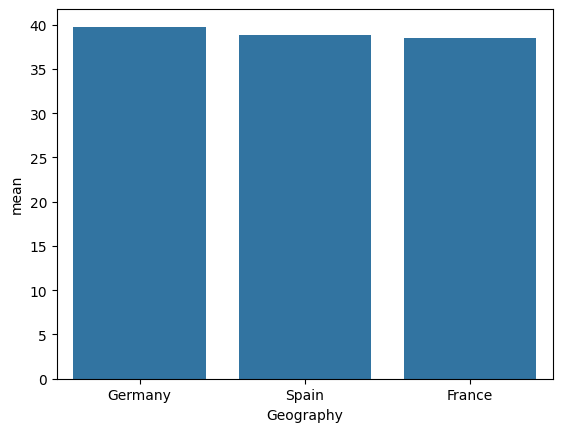

In [ ]:
import seaborn as sns

visual = dataset.groupby(['Geography'])['Age'].agg(['mean', 'std']).reset_index().sort_values(by='mean', ascending=False)
ax = sns.barplot(x="Geography", y="mean", data=visual)

In [ ]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
dataset = dataset.iloc[:,3:]
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
dataset['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


#### Credit Score Demography

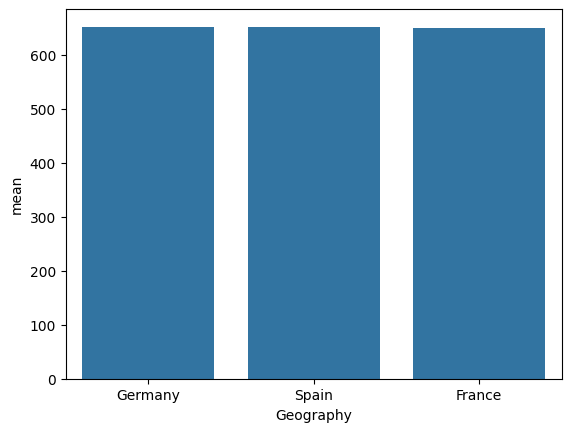

In [ ]:
visual = dataset.groupby(['Geography'])['CreditScore'].agg(['mean', 'std']).reset_index().sort_values(by='mean', ascending=False)
ax = sns.barplot(x="Geography", y="mean", data=visual)

#### Estimated Salary Demography

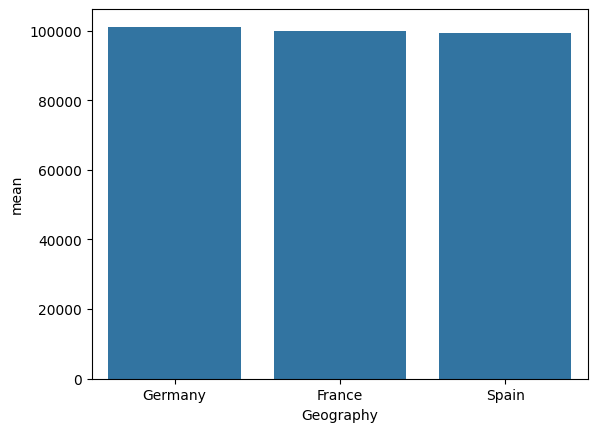

In [ ]:
visual = dataset.groupby(['Geography'])['EstimatedSalary'].agg(['mean', 'std']).reset_index().sort_values(by='mean', ascending=False)
ax = sns.barplot(x="Geography", y="mean", data=visual)

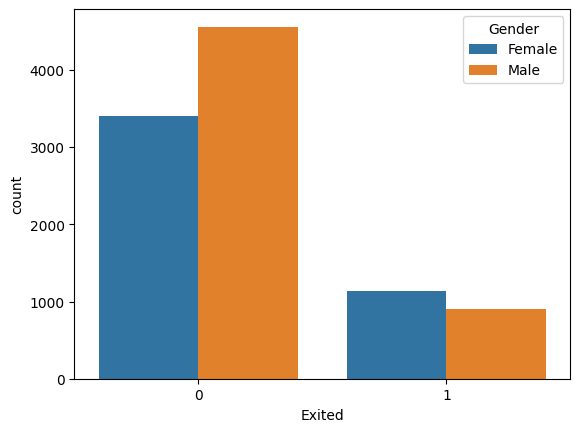

In [ ]:
ax = sns.countplot(x="Exited", hue="Gender", data=dataset)

In [ ]:
dataset['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


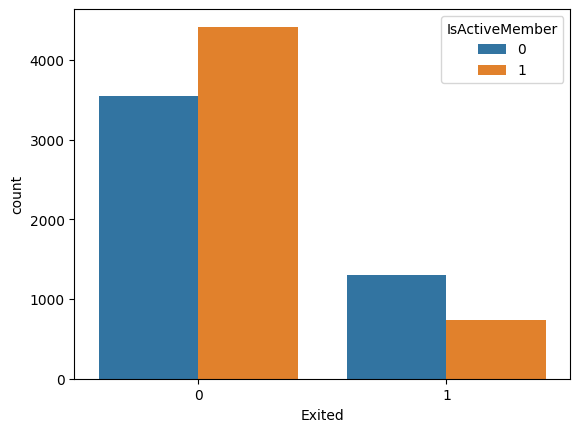

In [ ]:
ax = sns.countplot(x="Exited", hue="IsActiveMember", data=dataset)

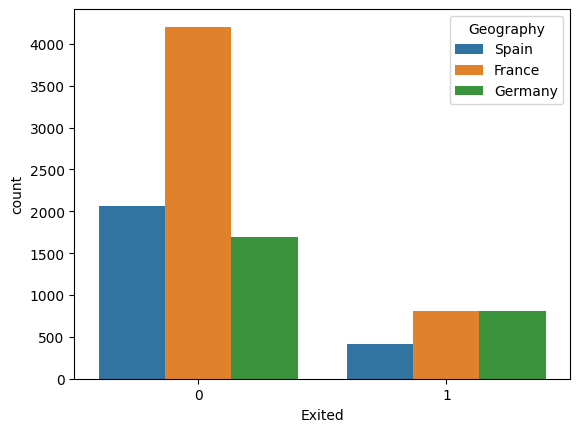

In [ ]:
ax = sns.countplot(x="Exited", hue="Geography", data=dataset)

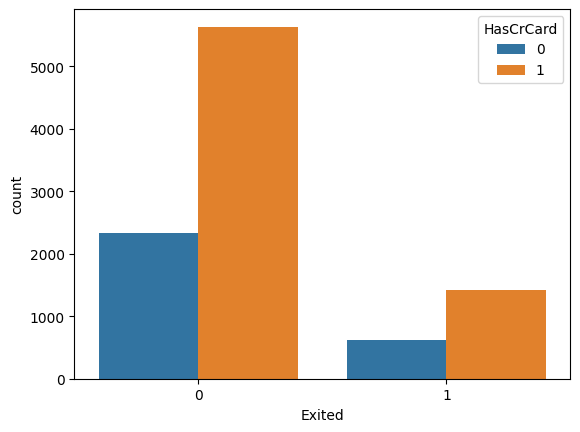

In [ ]:
ax = sns.countplot(x="Exited", hue="HasCrCard", data=dataset)

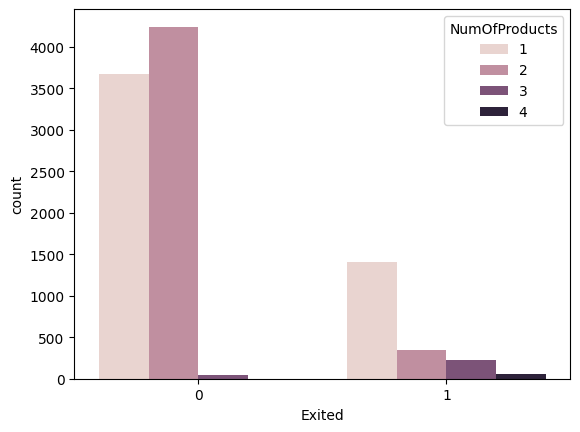

In [ ]:
ax = sns.countplot(x="Exited", hue="NumOfProducts", data=dataset)

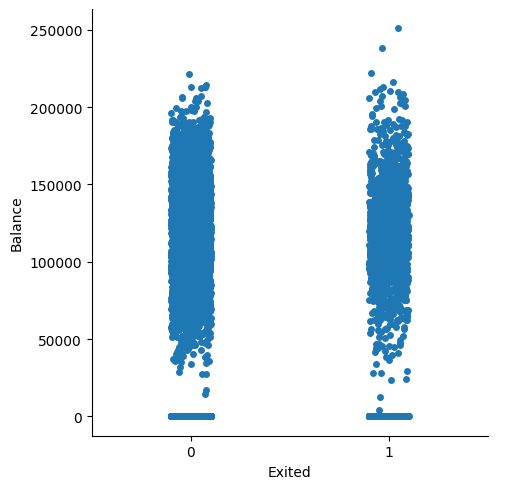

In [ ]:
g = sns.catplot(x="Exited", y="Balance", data=dataset)

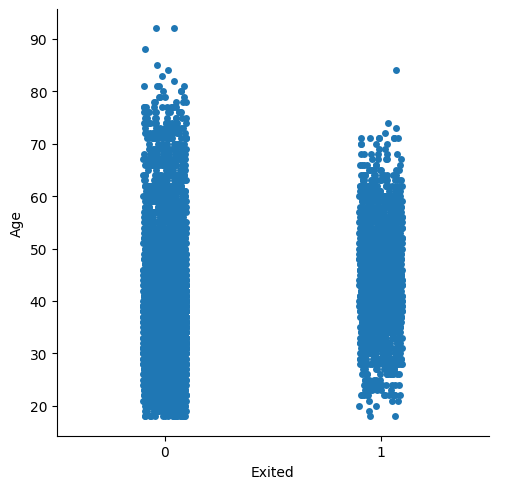

In [ ]:
g = sns.catplot(x="Exited", y="Age", data=dataset)

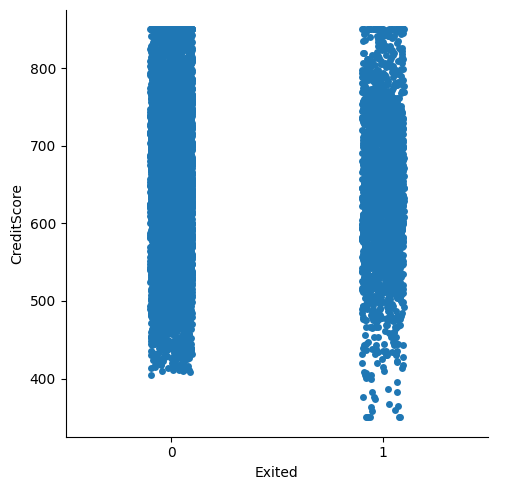

In [ ]:
g = sns.catplot(x="Exited", y="CreditScore", data=dataset)

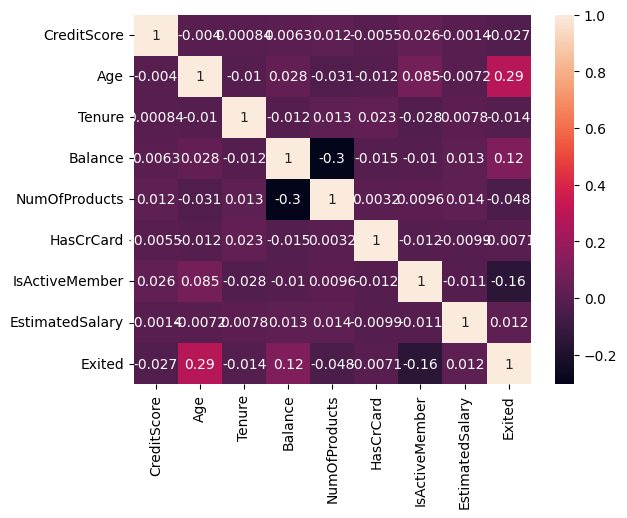

In [ ]:
sns.heatmap(dataset.corr(numeric_only=True), annot=True);

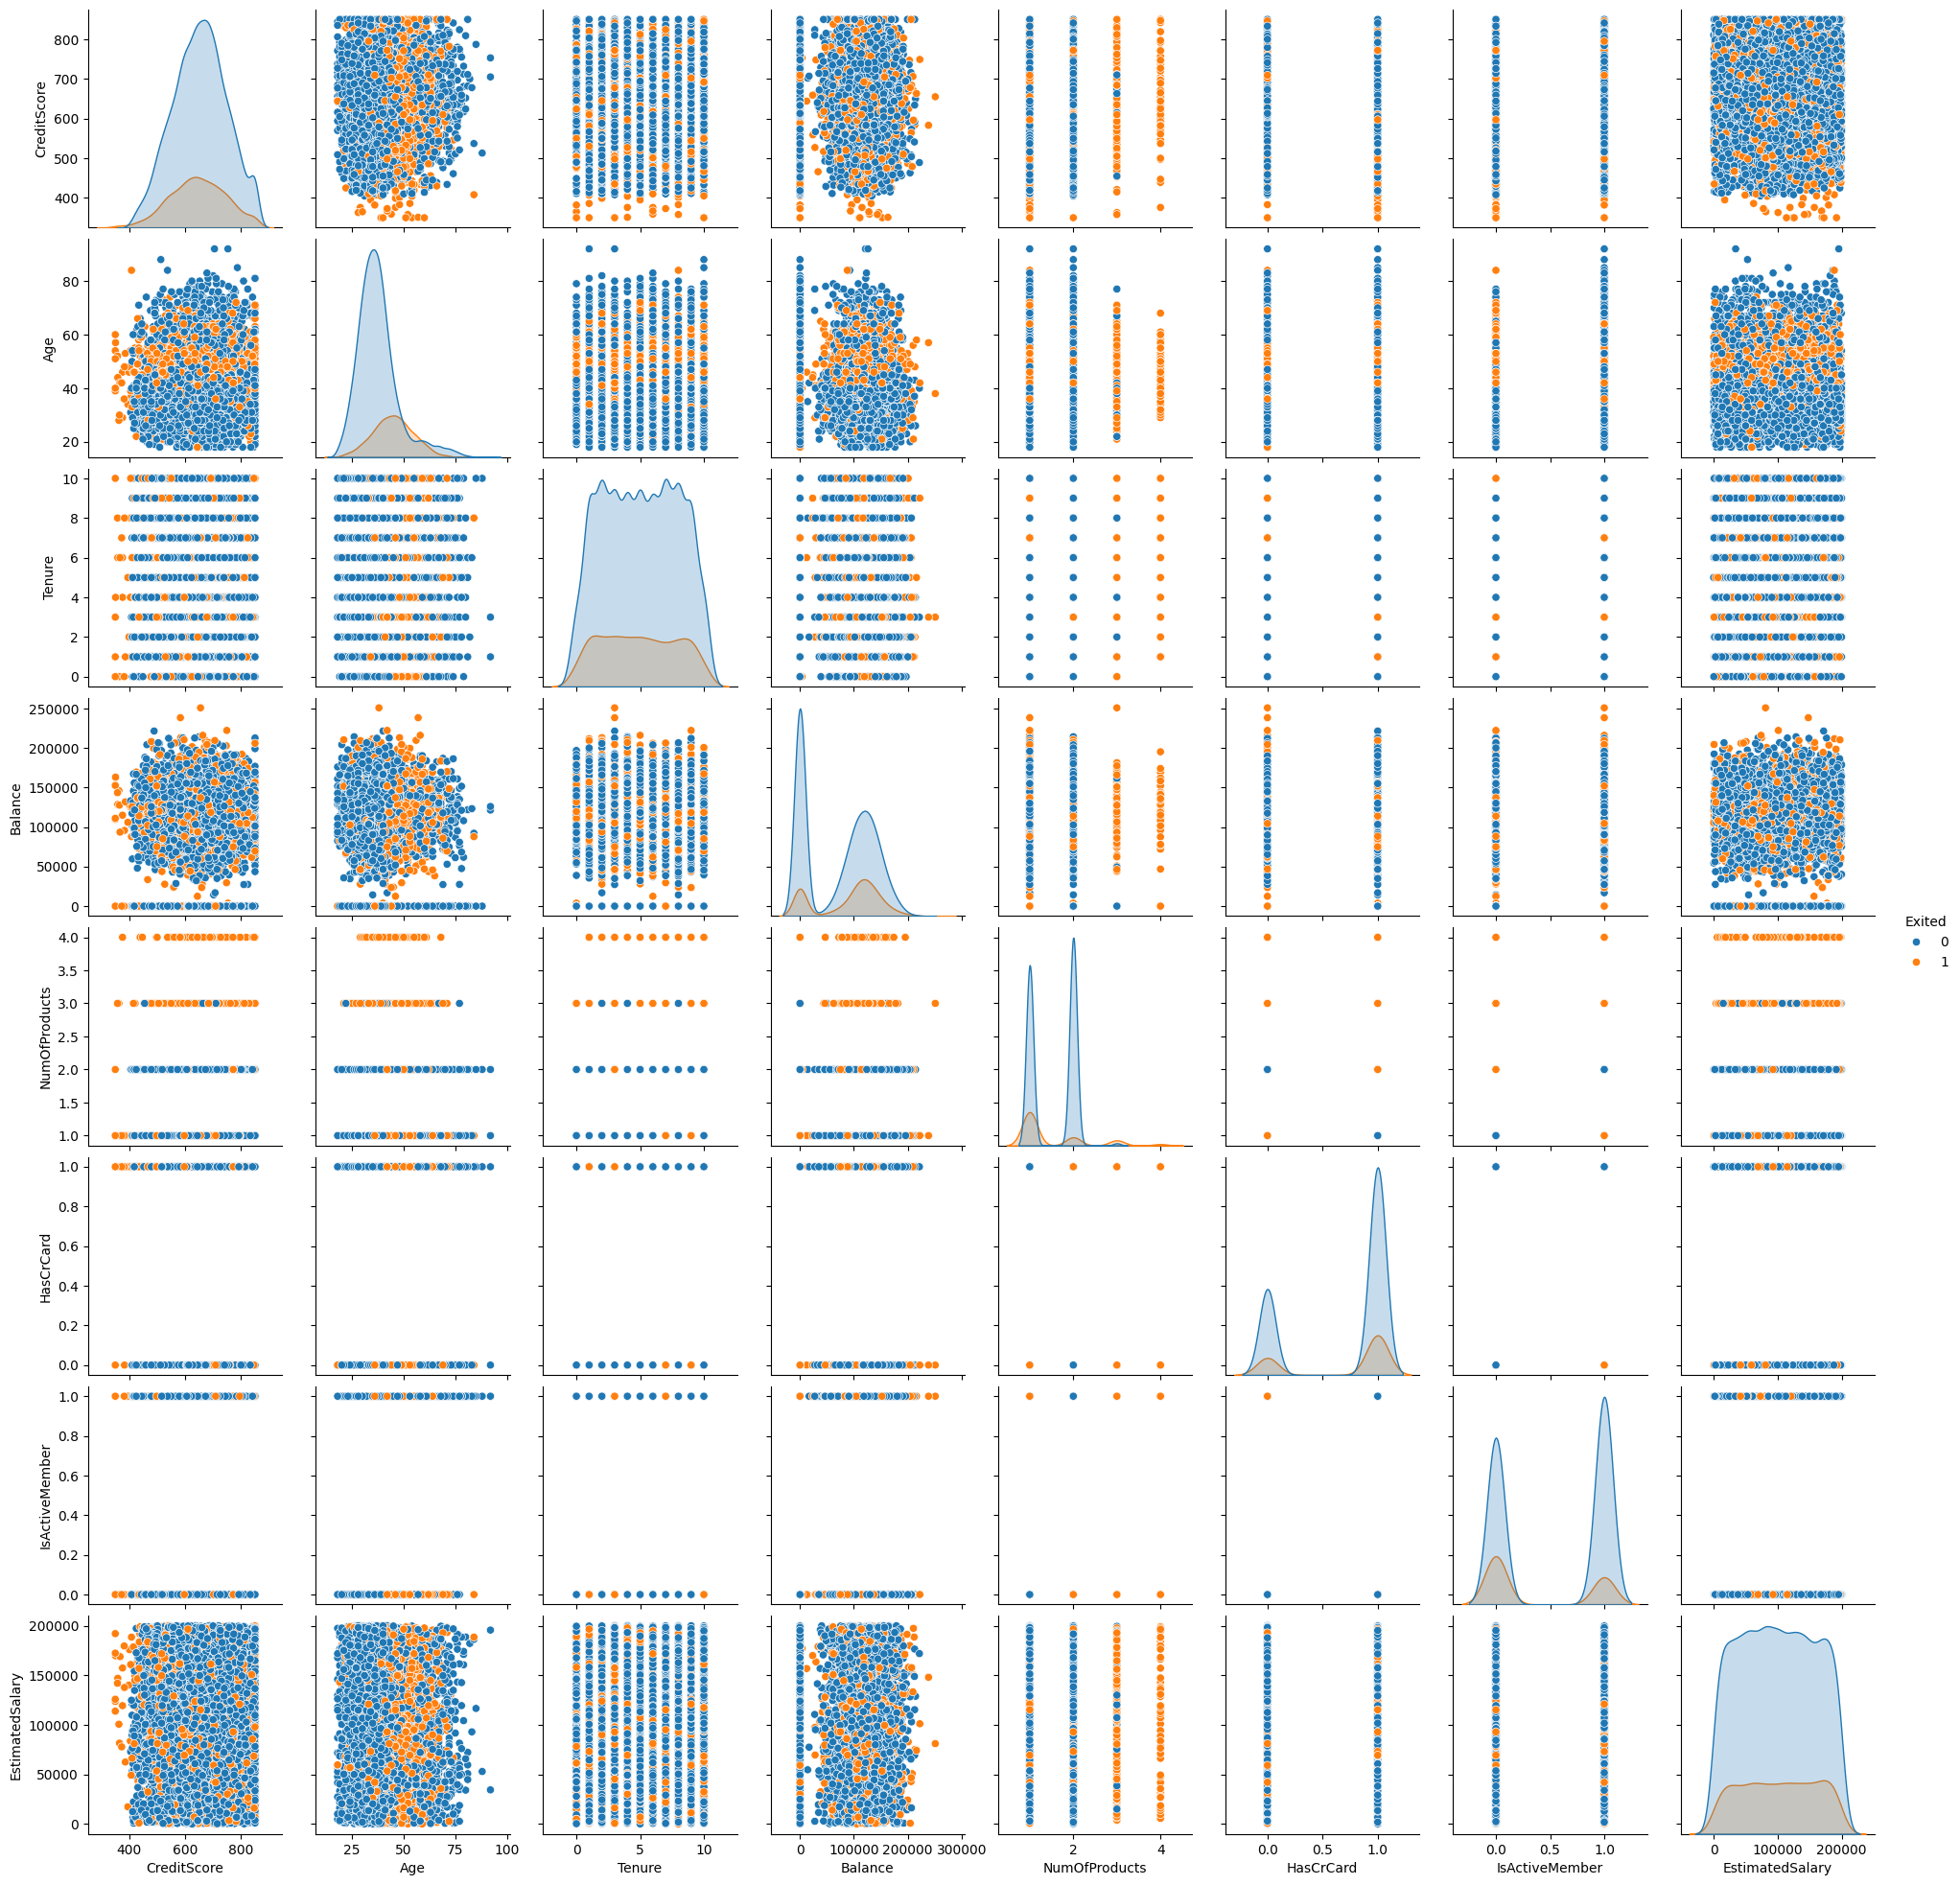

In [ ]:
g = sns.pairplot(dataset, hue="Exited")

### Encoding categorical data

Label Encoding the "Gender" column

In [ ]:
dataset

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['Gender'] = le.fit_transform(dataset['Gender'])

In [ ]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
dataset['Gender'].unique()

array([0, 1])

One Hot Encoding the "Geography" column

In [ ]:
dfs = pd.get_dummies(dataset, drop_first=True)
dfs.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True


In [ ]:
dataset

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


### Splitting the dataset into the Training set and Test set

In [ ]:
X = dfs.drop(columns=['Exited'])
y = dfs['Exited']

In [ ]:
X

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,False,True
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,False,False
9996,516,1,35,10,57369.61,1,1,1,101699.77,False,False
9997,709,0,36,7,0.00,1,0,1,42085.58,False,False
9998,772,1,42,3,75075.31,2,1,0,92888.52,True,False


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
X_test

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain
9394,597,0,35,8,131101.04,1,1,1,192852.67,True,False
898,523,0,40,2,102967.41,1,1,0,128702.10,False,False
2398,706,0,42,8,95386.82,1,1,1,75732.25,False,True
5906,788,1,32,4,112079.58,1,0,0,89368.59,False,False
2343,706,1,38,5,163034.82,2,1,1,135662.17,True,False
...,...,...,...,...,...,...,...,...,...,...,...
1037,625,0,24,1,0.00,2,1,1,180969.55,False,False
2899,586,0,35,7,0.00,2,1,0,70760.69,False,False
9549,578,1,36,1,157267.95,2,1,0,141533.19,False,True
2740,650,1,34,4,142393.11,1,1,1,11276.48,True,False


### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[ 0.16958176, -1.09168714, -0.46460796, ...,  1.10643166,
        -0.5698444 ,  1.74309049],
       [-2.30455945,  0.91601335,  0.30102557, ..., -0.74866447,
         1.75486502, -0.57369368],
       [-1.19119591, -1.09168714, -0.94312892, ...,  1.48533467,
        -0.5698444 , -0.57369368],
       ...,
       [ 0.9015152 ,  0.91601335, -0.36890377, ...,  1.41231994,
        -0.5698444 , -0.57369368],
       [-0.62420521, -1.09168714, -0.08179119, ...,  0.84432121,
        -0.5698444 ,  1.74309049],
       [-0.28401079, -1.09168714,  0.87525072, ...,  0.32472465,
         1.75486502, -0.57369368]])

In [ ]:
y_train

,Exited
7389,0
9275,0
2995,0
5316,0
356,0
...,...
9225,0
4859,0
3264,0
9845,0


## Part 2 - Building the ANN

### Initializing the ANN

In [ ]:
ann = tf.keras.models.Sequential() #instansiasi objek ANN yg masih kosong

### Adding the input layer and the first hidden layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the second hidden layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

In [ ]:
import keras
from datetime import datetime

# Define the Keras TensorBoard callback.
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

ann.fit(X_train, y_train, batch_size = 32, epochs = 100, callbacks=[tensorboard_callback])

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7645 - loss: 0.6163
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7997 - loss: 0.4538
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7949 - loss: 0.4407
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8064 - loss: 0.4241
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8119 - loss: 0.4215
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8197 - loss: 0.4227
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8239 - loss: 0.4146
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8269 - loss: 0.4181
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8241 - loss: 0.4104
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8260 - loss: 0.4066
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8256 - loss: 0.4127
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

## Part 4 - Making the predictions and evaluating the model

### Predicting the result of a single observation

**Solution**

In [ ]:
dfs

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,False,False
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,False,False
9997,709,0,36,7,0.00,1,0,1,42085.58,1,False,False
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,True,False


In [ ]:
ann.predict(sc.transform([[600, 1, 40, 3, 60000, 2, 1, 1, 50000, 0, 0]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.03921693]], dtype=float32)

In [ ]:
print(ann.predict(sc.transform([[600, 1, 40, 3, 60000, 2, 1, 1, 50000, 0, 0]])) > 0.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


[[False]]


### Predicting the Test set results

In [ ]:
y_pred = ann.predict(X_test)
y_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


array([[0.20929936],
       [0.3180046 ],
       [0.16127756],
       ...,
       [0.08699781],
       [0.19385803],
       [0.2212211 ]], dtype=float32)

In [ ]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

### Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1518   77]
 [ 193  212]]


0.865

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1595
           1       0.73      0.52      0.61       405

    accuracy                           0.86      2000
   macro avg       0.81      0.74      0.76      2000
weighted avg       0.86      0.86      0.86      2000

